## Лабораторна робота 4. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

dataset = pd.read_csv('motorbike_ambulance_calls.csv')
print(dataset)

       index      date  season  yr  mnth  hr  holiday  weekday  workingday  \
0          1    1/1/11  spring   0     1   0        0        6           0   
1          2    1/1/11  spring   0     1   1        0        6           0   
2          3    1/1/11  spring   0     1   2        0        6           0   
3          4    1/1/11  spring   0     1   3        0        6           0   
4          5    1/1/11  spring   0     1   4        0        6           0   
...      ...       ...     ...  ..   ...  ..      ...      ...         ...   
17374  17375  12/31/12  spring   1    12  19        0        1           1   
17375  17376  12/31/12  spring   1    12  20        0        1           1   
17376  17377  12/31/12  spring   1    12  21        0        1           1   
17377  17378  12/31/12  spring   1    12  22        0        1           1   
17378  17379  12/31/12  spring   1    12  23        0        1           1   

       weathersit  temp   atemp   hum  windspeed  cnt  
0      

In [ ]:
def get_data(data_path: str):
  data = #your code
  return data

In [ ]:
data = get_data(data_path=#your code)

In [2]:
print("Основна статистична інформація:")
print(dataset.describe())

print("\nМаксимальні значення:")
print(dataset.max())

print("\nМінімальні значення:")
print(dataset.min())


print("\nРозмірність датасету:")
print(dataset.shape)


Максимальні значення:
index          17379
date          9/9/12
season        winter
yr                 1
mnth              12
hr                23
holiday            1
weekday            6
workingday         1
weathersit         4
temp             1.0
atemp            1.0
hum              1.0
windspeed     0.8507
cnt              977
dtype: object

Мінімальні значення:
index              1
date          1/1/11
season        autumn
yr                 0
mnth               1
hr                 0
holiday            0
weekday            0
workingday         0
weathersit         1
temp            0.02
atemp            0.0
hum              0.0
windspeed        0.0
cnt                1
dtype: object

Розмірність датасету:
(17379, 15)


**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [3]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 2.0+ MB
None


**Завдання 3** пепевірте всі змінні на наявність пропусків.

In [4]:
print(dataset.isnull().sum())

index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


**Висновки з 1-3 завдання (детальні)**



1. вивили дані датасету (дивитись вище)
2. кількість даних 17
3. пропусків нема



**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [5]:
def get_time_limits(df: pd.DataFrame, date_col_name: str):
  first_day = #your code
  last_day = #your code
  print(f"First day of dataset - {first_day}.\n Last day of dataset - {last_day}")

SyntaxError: invalid syntax (1883552537.py, line 2)

In [ ]:
#your conclusions

#Аналіз категоріальних змінних

**Завдання 5** виділити категоріальні змінні в окремий датасет







In [4]:
data_categorical = dataset[['season', 'yr', 'mnth', 'weathersit', 'holiday', 'weekday', 'workingday']]

**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [5]:
season_mapping = {'spring': 1, 'summer': 2, 'autumn': 3, 'winter': 4}

# Використовуємо метод map для перетворення категоріальної змінної в числову
data_categorical['season'] = data_categorical['season'].map(season_mapping)

# Виведемо оновлений датасет
print(data_categorical)

       season  yr  mnth  weathersit  holiday  weekday  workingday
0           1   0     1           1        0        6           0
1           1   0     1           1        0        6           0
2           1   0     1           1        0        6           0
3           1   0     1           1        0        6           0
4           1   0     1           1        0        6           0
...       ...  ..   ...         ...      ...      ...         ...
17374       1   1    12           2        0        1           1
17375       1   1    12           2        0        1           1
17376       1   1    12           1        0        1           1
17377       1   1    12           1        0        1           1
17378       1   1    12           1        0        1           1

[17379 rows x 7 columns]


C:\Users\User\AppData\Local\Temp\ipykernel_15572\594830338.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_categorical['season'] = data_categorical['season'].map(season_mapping)


**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

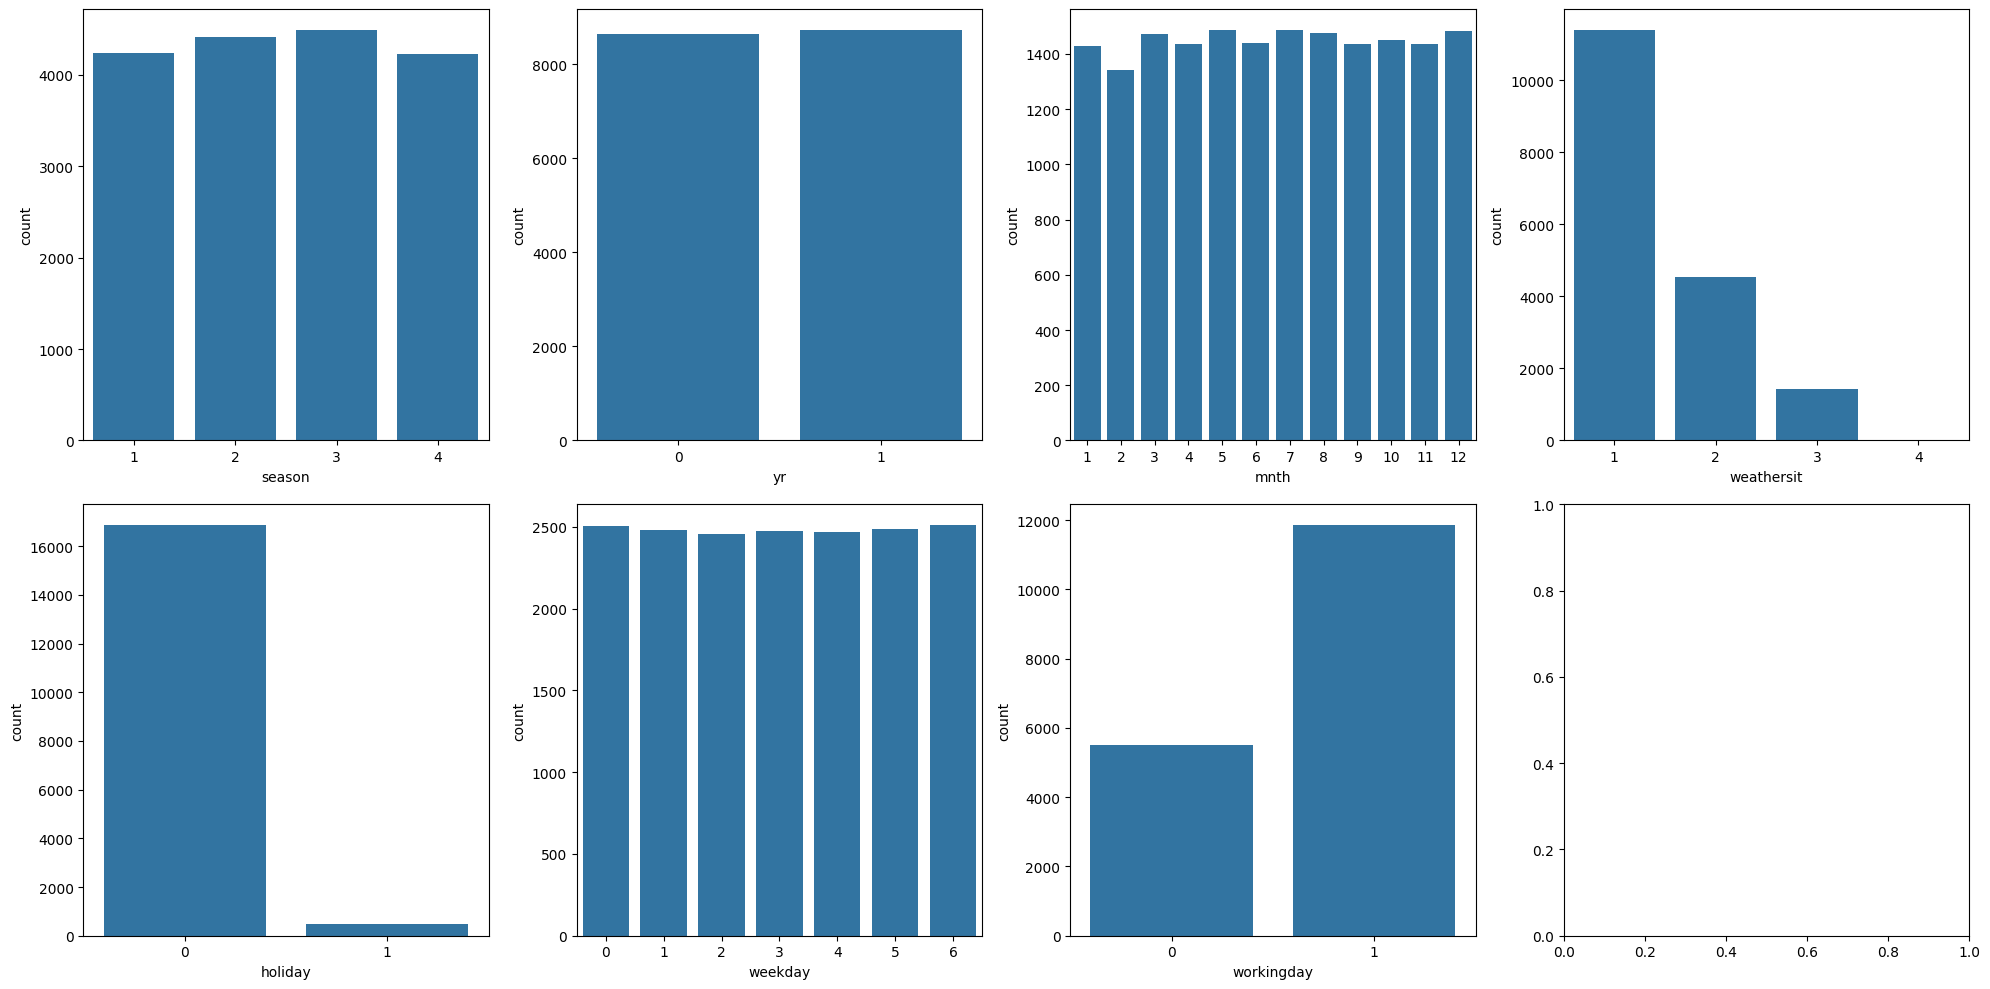

In [6]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(data_categorical, ax.flatten()):
  sns.countplot(x=variable, data=data_categorical, ax=subplot)
plt.tight_layout()
plt.show()

**Висновки з 5-7 завдання (детальні)**



1.   категоріальні змінні були записані в окремий датасет. туди потрапили 'season', 'yr', 'mnth', 'weathersit', 'holiday', 'weekday'
2.   для подальших маніпуляцій сезони були перетворені в числа
3.   побудовані графіки по кожній категоріальній змінній. Найчастіше швидка викликалась в ясну погоду, рідше під час туману чи хмарної погоди, ще рідше під час рясного дощу чи снігу, і не викликалась під час зливи. У будні швидка викликалась приблизно в 2 рази частіше ніж не викликалась. У вихідні швидка майже не викликалась.



#Аналіз числових змінних

**Завдання 8** виділити числові змінні в окремий датасет

In [7]:
data_numerical = dataset[['hr', 'temp', 'windspeed', 'hum', 'cnt']]

**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

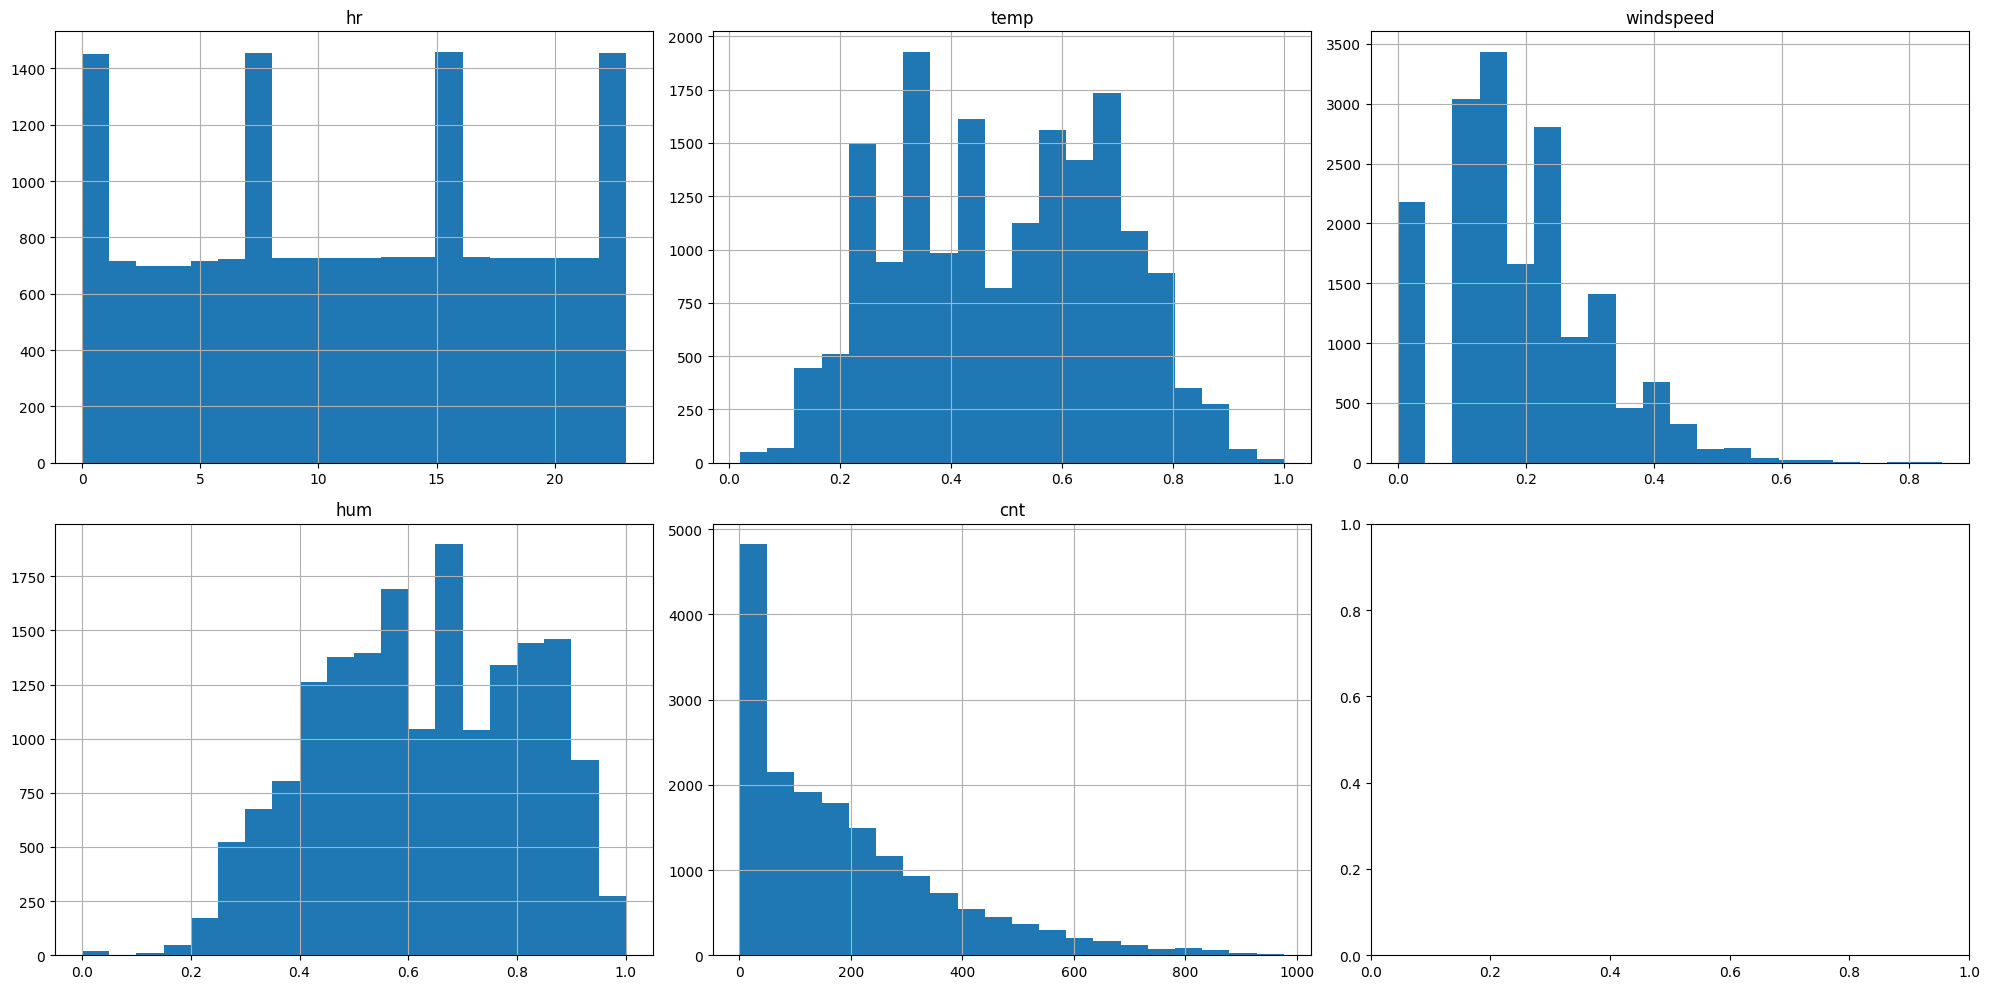

In [9]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for variable, subplot in zip(data_numerical.columns, ax.flatten()):
    data_numerical[variable].hist(ax=subplot, bins=20)
    subplot.set_title(variable)

plt.tight_layout()
plt.show()

**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

Коефіцієнт нахилу гістограми:  0.01006460953277201


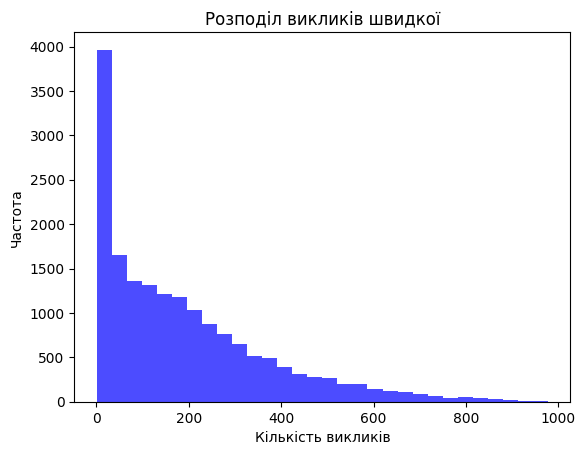

In [11]:
plt.hist(dataset['cnt'], bins=30, color='blue', alpha=0.7)
plt.title('Розподіл викликів швидкої')
plt.xlabel('Кількість викликів')
plt.ylabel('Частота')

slope, intercept = np.polyfit(dataset.index, dataset['cnt'], 1)
print("Коефіцієнт нахилу гістограми: ", slope)


**Висновки з 8-10 завдання (детальні)**



1.  в датасет непервних часових змінних потрапили колонки: 'hr', 'temp', 'windspeed', 'hum', 'cnt'
2.   
3. коефіцієнт нахилу - 0.01006460953277201



#Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

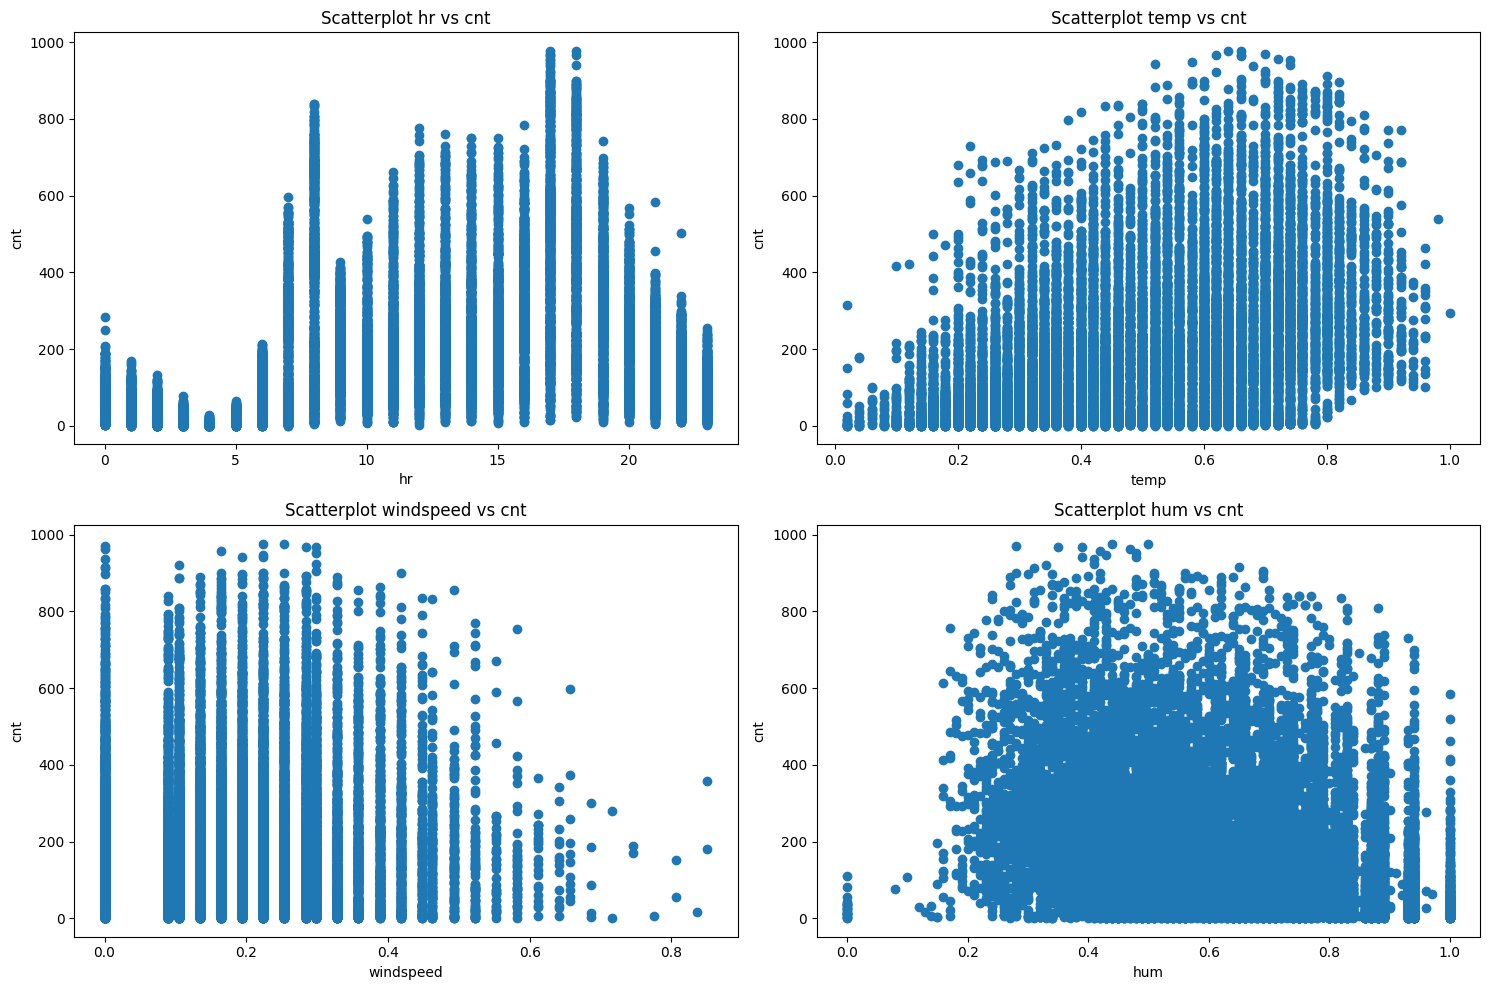

In [12]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))
for var, subplot in zip(data_numerical.drop('cnt', axis =1), ax.flatten()):
  subplot.scatter(data_numerical[var], data_numerical['cnt'])
  subplot.set_title(f'Scatterplot {var} vs cnt')
  subplot.set_xlabel(var)
  subplot.set_ylabel('cnt')

plt.tight_layout()
plt.show()

**Завдання 12** побудуйте графіки співвідношення `boxplot`[boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

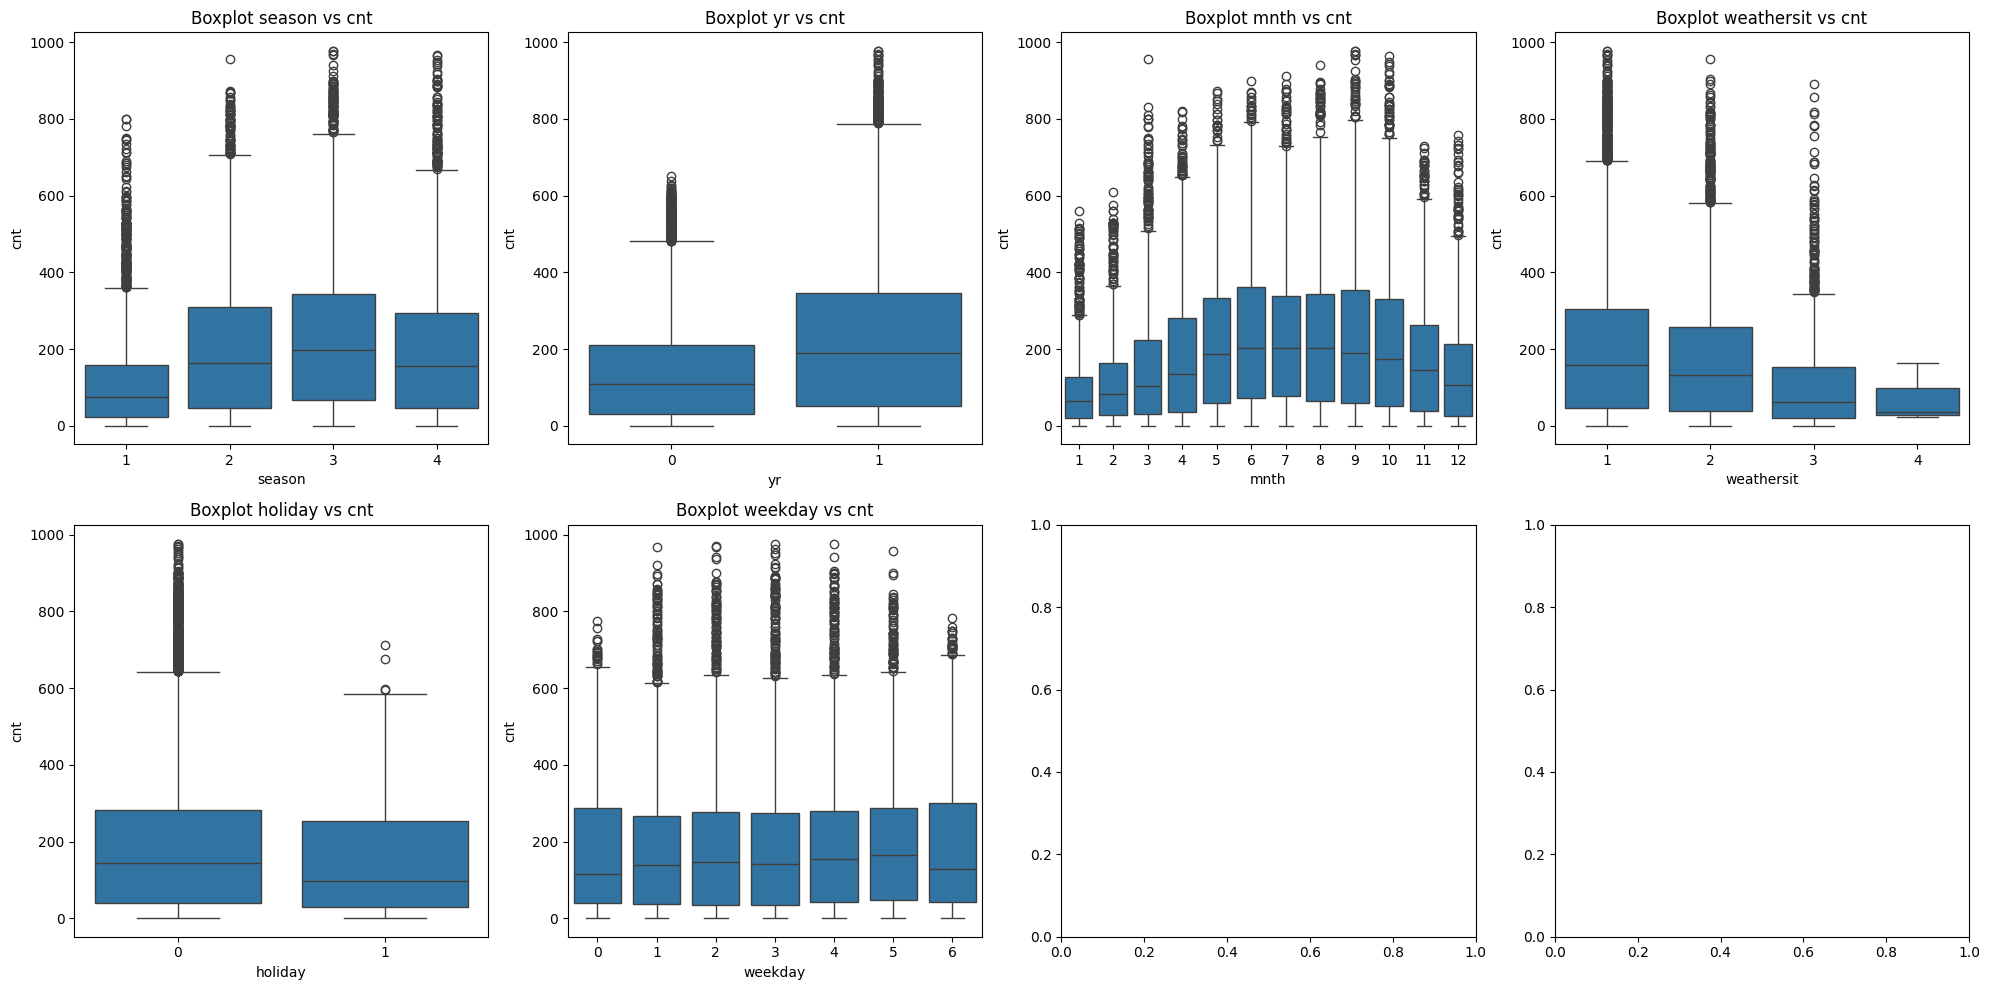

In [13]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for var, subplot in zip(data_categorical, ax.flatten()):
  sns.boxplot(x=data_categorical[var], y=data_numerical['cnt'], ax=subplot)
  subplot.set_title(f'Boxplot {var} vs cnt')
  subplot.set_xlabel(var)
  subplot.set_ylabel('cnt')

plt.tight_layout()
plt.show()

**Висновки з 11-12 завдання (детальні)**



1.   
2.   




**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

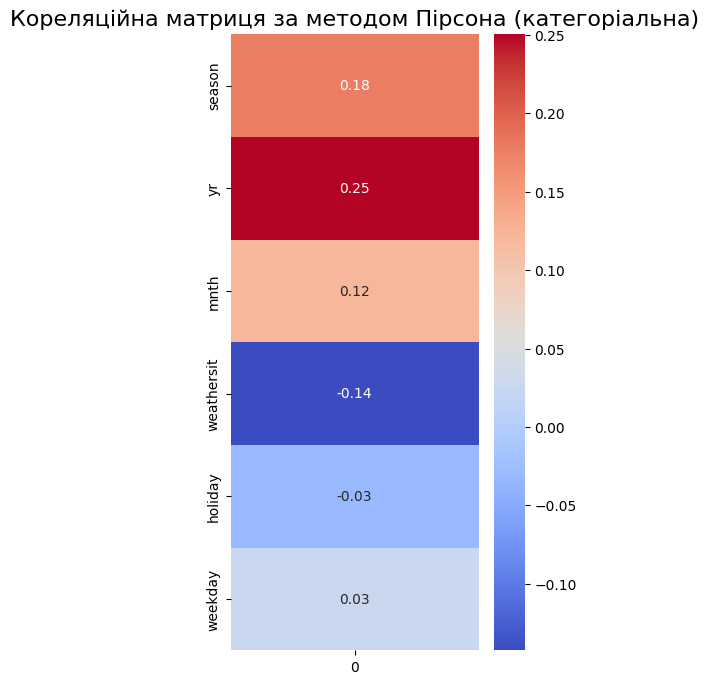

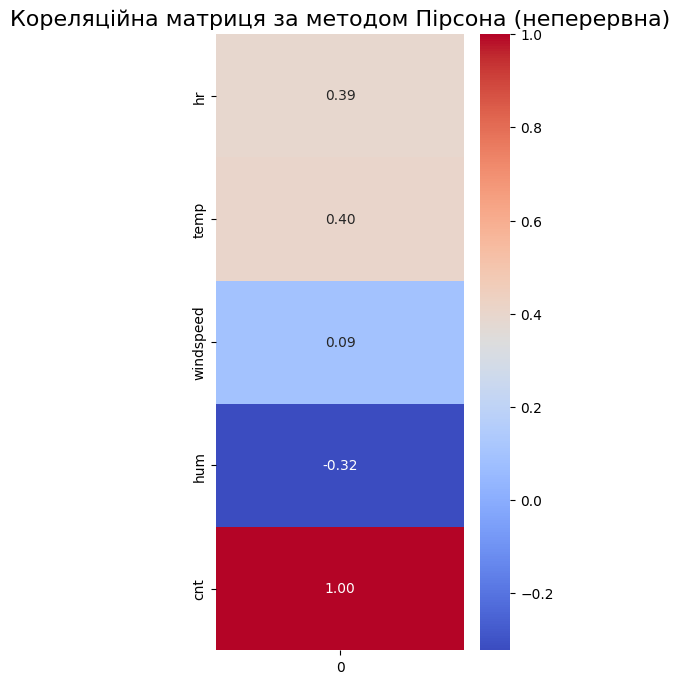

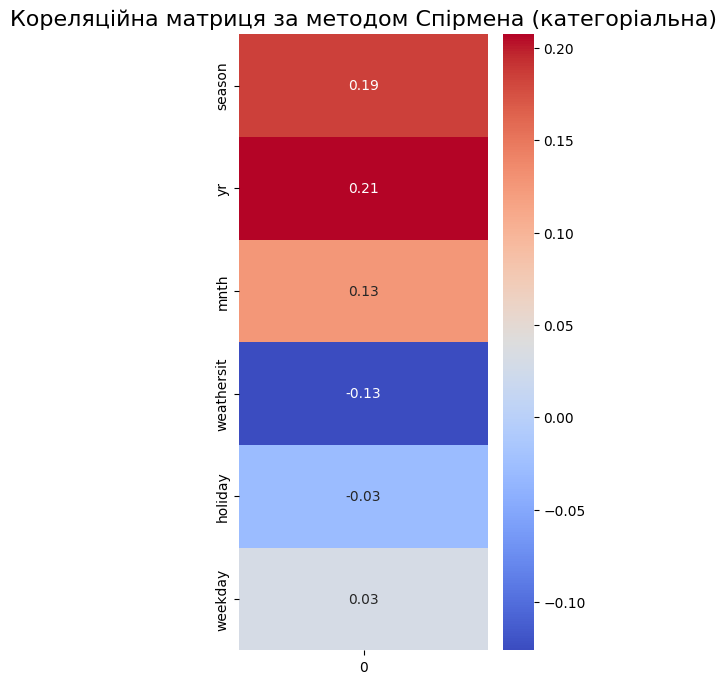

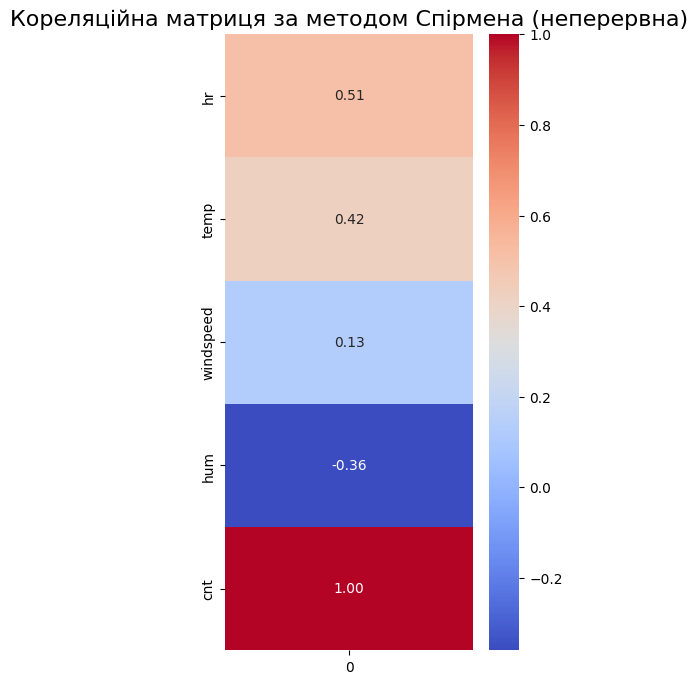

In [14]:

pearson_categorical_corr = data_categorical.corrwith(data_numerical['cnt'], method='pearson').to_frame()
# pearson_numerical_corr = data_numerical.corrwith(data_numerical['cnt'], method='pearson').to_frame()

# spearman_categorical_corr = data_categorical.corrwith(data_numerical['cnt'], method='spearman').to_frame()
spearman_numerical_corr = data_numerical.corrwith(data_numerical['cnt'], method='spearman').to_frame()

plt.figure(figsize=(4, 8))
sns.heatmap(pearson_categorical_corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Кореляційна матриця за методом Пірсона (категоріальна)', fontsize=16)
plt.show()

# plt.figure(figsize=(4, 8))
# sns.heatmap(pearson_numerical_corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
# plt.title('Кореляційна матриця за методом Пірсона (неперервна)', fontsize=16)
# plt.show()

# plt.figure(figsize=(4, 8))
# sns.heatmap(spearman_categorical_corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
# plt.title('Кореляційна матриця за методом Спірмена (категоріальна)', fontsize=16)
# plt.show()


plt.figure(figsize=(4, 8))
sns.heatmap(spearman_numerical_corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Кореляційна матриця за методом Спірмена (неперервна)', fontsize=16)
plt.show()


In [ ]:
#your conclusions 

Висновки: (не звертайте уваги на зайвий код та кореляції, це я робив для цікавості)
з категоріальних змінних найблільше корелює рік, пора року та погода
з неперервних година температура та вологість(обернено тобто чим нижча вологи тим більше викликів)

**Завдання 14** 
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [15]:
def get_dummies(df: pd.DataFrame):
  features = pd.concat([df,
                      pd.get_dummies(df['season']),
                      ], axis = 1
                     )
  features = features.drop(['season',
                            'mnth', 
                            'weekday', 
                            'weathersit'
                            ], axis = 1)
  return features

In [17]:
features = get_dummies(dataset)
print(features)

       index      date  yr  hr  holiday  workingday  temp   atemp   hum  \
0          1    1/1/11   0   0        0           0  0.24  0.2879  0.81   
1          2    1/1/11   0   1        0           0  0.22  0.2727  0.80   
2          3    1/1/11   0   2        0           0  0.22  0.2727  0.80   
3          4    1/1/11   0   3        0           0  0.24  0.2879  0.75   
4          5    1/1/11   0   4        0           0  0.24  0.2879  0.75   
...      ...       ...  ..  ..      ...         ...   ...     ...   ...   
17374  17375  12/31/12   1  19        0           1  0.26  0.2576  0.60   
17375  17376  12/31/12   1  20        0           1  0.26  0.2576  0.60   
17376  17377  12/31/12   1  21        0           1  0.26  0.2576  0.60   
17377  17378  12/31/12   1  22        0           1  0.26  0.2727  0.56   
17378  17379  12/31/12   1  23        0           1  0.26  0.2727  0.65   

       windspeed  cnt  autumn  spring  summer  winter  
0         0.0000   16   False    True   Fal

2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [18]:
night_hours = [18, 19, 20, 21, 22, 23, 0, 1, 2, 3]
features['night_hours'] = dataset['hr'].map(lambda hr: 0 if night_hours.count(hr) == 0 else 1)
print(features['night_hours'])
features = features.drop('hr', axis = 1)

0        1
1        1
2        1
3        1
4        0
        ..
17374    1
17375    1
17376    1
17377    1
17378    1
Name: night_hours, Length: 17379, dtype: int64


**Модель лінійної регрессії  

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

atemp видаляєм через мультиколінеарність 
date ні на що не впливає (максимум якісь свята, але вони будуть аномальними тому краще видалити)

In [27]:
features_lr = features.drop(['atemp', 'date'], axis = 1)
print(features_lr)


       index  yr  holiday  workingday  temp   hum  windspeed  cnt  autumn  \
0          1   0        0           0  0.24  0.81     0.0000   16   False   
1          2   0        0           0  0.22  0.80     0.0000   40   False   
2          3   0        0           0  0.22  0.80     0.0000   32   False   
3          4   0        0           0  0.24  0.75     0.0000   13   False   
4          5   0        0           0  0.24  0.75     0.0000    1   False   
...      ...  ..      ...         ...   ...   ...        ...  ...     ...   
17374  17375   1        0           1  0.26  0.60     0.1642  119   False   
17375  17376   1        0           1  0.26  0.60     0.1642   89   False   
17376  17377   1        0           1  0.26  0.60     0.1642   90   False   
17377  17378   1        0           1  0.26  0.56     0.1343   61   False   
17378  17379   1        0           1  0.26  0.65     0.1343   49   False   

       spring  summer  winter  night_hours  
0        True   False   False 

In [28]:
def get_train_data(df: pd.DataFrame, target:str, test_size:float):
  X = df.drop(columns=[target], axis=1)
  y = df[target] 
  X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=42, shuffle = True)
  return X_train, X_test, y_train, y_test

In [29]:
X_train, X_test, y_train, y_test = get_train_data(features_lr, 'cnt', 0.3)

In [30]:
def train_linear_model(X_train, y_train):
  model = LinearRegression()
  model.fit(X_train, y_train)
  return model

model = train_linear_model(X_train, y_train)

In [31]:
# predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# scores
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 21788.002, test: 21055.921
R^2 train: 0.349, test: 0.333


Оскільки в нашій моделі є багато незалежних змінних, ми не можемо відобразити їх залежність у двовимірному просторі, але ми можемо побудувати графік взаємозв'язку між залишками моделі та передбачуваними значеннями, що також допоможе нам оцінити якість моделі.

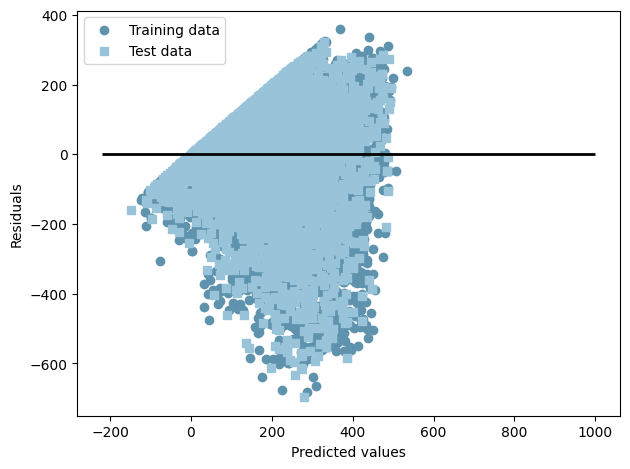

In [32]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='#5f93ad', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='#98c3d9', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')
plt.tight_layout()

**Висновки з завдання (детальні)**



1.   MSE для тренувальних даних складає 21788.002, а для тестового - 21055.921
2.   R^2 для тренувальних даних становить 0.349, а для тестового - 0.333 (це досить мало, тобто моделька може бути кращою. можливо я зробив щось не так=(  )


